In [84]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

In [28]:
df=pd.read_csv('pima.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [31]:
x=df.drop(columns=['Outcome'])
y=df['Outcome']

In [32]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20)

In [33]:
model=RandomForestClassifier()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

In [36]:
print(accuracy_score(ytest,ypred))

0.7922077922077922


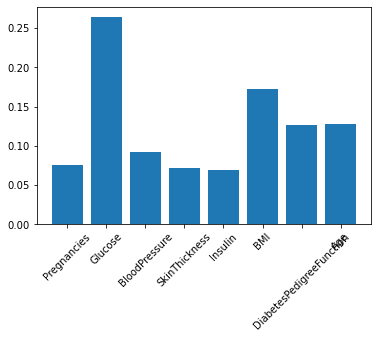

In [43]:
plt.bar(x.columns,model.feature_importances_)
plt.xticks(rotation=45)
plt.show()

In [77]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [82]:
grid_search = GridSearchCV(estimator=model,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")
grid_search.fit(xtrain,ytrain)
grid_search.predict(xtest)
rf_best = grid_search.best_estimator_
print(grid_search.best_estimater_)


Fitting 4 folds for each of 180 candidates, totalling 720 fits


ValueError: Invalid parameter max_depth for estimator GridSearchCV(cv=4,
             estimator=GridSearchCV(cv=4,
                                    estimator=GridSearchCV(cv=4,
                                                           estimator=GridSearchCV(cv=4,
                                                                                  estimator=GridSearchCV(cv=4,
                                                                                                         estimator=GridSearchCV(cv=4,
                                                                                                                                estimator=GridSearchCV(cv=4,
                                                                                                                                                       estimator=GridSearchCV(cv=4,
                                                                                                                                                                              estimator=GridSearchCV(cv=4,
                                                                                                                                                                                                     estimator=GridSearchCV(cv=4,
                                                                                                                                                                                                                            estimator=GridSearchCV(cv=4,
                                                                                                                                                                                                                                                   estimator=GridSearchCV(cv=4,
                                                                                                                                                                                                                                                                          estimator=RandomForestCl...
                                                                                                                         50,
                                                                                                                         100,
                                                                                                                         200],
                                                                                               'n_estimators': [10,
                                                                                                                20,
                                                                                                                30,
                                                                                                                50,
                                                                                                                100,
                                                                                                                200]}],
                                                                                  scoring='accuracy'),
                                                           param_grid=[{'n_estimators': [10,
                                                                                         20,
                                                                                         30,
                                                                                         50,
                                                                                         100,
                                                                                         200]}],
                                                           scoring='accuracy'),
                                    param_grid=[{'n_estimators': [10, 20, 30,
                                                                  50, 100,
                                                                  200]}],
                                    scoring='accuracy'),
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy'). Check the list of available parameters with `estimator.get_params().keys()`.

In [85]:
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True);
plt.show()

NameError: name 'rf_best' is not defined

<Figure size 5760x2880 with 0 Axes>